# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('chained_assignment', None)
data = pd.read_csv('/Users/sasha/Desktop/real_estate_data.csv',sep='\t') 
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

При первом взгляде на данные, сразу видны пропуски во многих столбцах.Некорректные форматы данных в столбцах.Выведим информацию о данных методом info()и методом describe()посмотрим статистические данные.В столбце с названием населенного пункта слово поселок написано через 'ё' и 'е' что может привести к дубликатам в столбце, а следовательно и к ошибкам в анализе.В некоторых столбцах видим сильное отклонение от среднего, что говорит о большом количестве выбросов.

## Предобработка данных

In [4]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['is_apartment']=data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['last_price'] = (data['last_price']/1000).astype('int')
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()).astype('int')
def ceiling(x):
    if x>20:
        return x/10
    return x
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)

### Вывод:

Методом isnull() определяем пропущенные значения.
Заполняем пропущенные значения и меняем тип данных в столбцах:
- В столбце апартаменты меняем тип данных на bool 
- В столбце дата публикации меняем тип данных на datetime для корректного отображения
- В столбце высота потолков заменяем пропущенные значения на медианное(2,65), так как это стандартная высота потолков и встречается наиболее часто.Так же функцией ceiling изменим анамальные значения,возможно они появились из за ошибки с плавающей точкой.
- В столбце число балконов меняем пропущенные значения на 0 так как в этом случае имеем ввиду что балкона нет и меняем тип данных на int
- В столбце цена делим ее на 1000 руб. для удобства подсчетов и анализа графиков и будем считать в тыс.руб, так же изменим тип данных на int
- В столбце название населенного пункта методом replace() заменим разное написание слова 'поселок' на одинаковое 'посёлок'
- Пропущенные значения в столбце сколько дней было размещено объявление (от публикации до снятия) заменим на медианное так как оно менее подвержено выбросам.Изменим тип данных на int так как число дней целое.

## Расчёты и добавление результатов в таблицу

In [6]:
data['price_m2'] = data['last_price'] / data['total_area']
data['price_m2'] = data['price_m2'].astype(int)
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

def floor(data):
    if data['floor'] == 1:
        return 'Первый'
    if data['floor'] == data['floors_total']:
        return 'Последний'
    return 'Другой'
data['flat_floor'] = data.apply(floor,axis=1)
data['living_total_area'] = data['living_area']/data['total_area']
data['kitchen_total_area'] = data['kitchen_area']/data['total_area']

### Вывод

Считаем и добавляем в таблицу:
- цену квадратного метра price_m2
- день недели, месяц и год публикации объявления
- этаж квартиры варианты — первый, последний, другой flat_floor
- соотношение жилой и общей площади living_total_area, а также отношение площади кухни к общей kitchen_total_area

## Исследовательский анализ данных

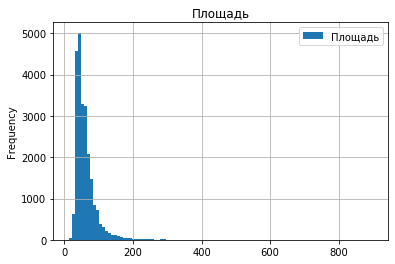

In [7]:
data.plot(y='total_area',bins=100,kind='hist',label='Площадь',title='Площадь',grid=True)

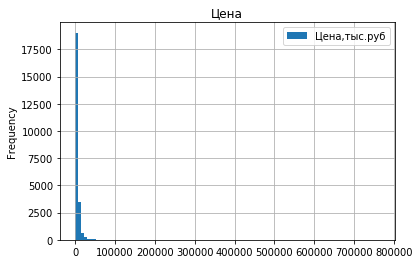

In [8]:
data.plot(y='last_price',bins=100,kind='hist',label='Цена,тыс.руб',title='Цена',grid=True)

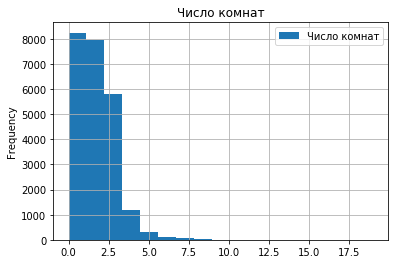

In [9]:
data.plot(y='rooms',kind='hist',label='Число комнат',title='Число комнат',grid=True, bins=17)

(2.5, 3)

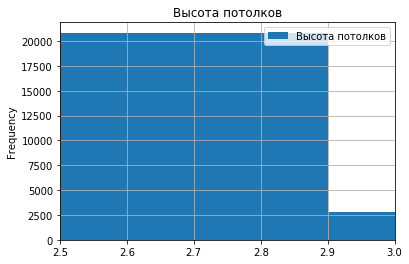

In [10]:
data.plot(y='ceiling_height', kind='hist',label='Высота потолков',title='Высота потолков',grid=True, bins = 10)
plt.xlim(2.5, 3)

In [11]:
data[['total_area','ceiling_height','rooms','last_price']].describe()

,total_area,ceiling_height,rooms,last_price
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.348651,2.699480,2.070636,6541.532723
std,35.654083,0.276991,1.078405,10887.008378
min,12.000000,1.000000,0.000000,12.000000
25%,40.000000,2.600000,1.000000,3400.000000
50%,52.000000,2.650000,2.000000,4650.000000
75%,69.900000,2.700000,3.000000,6800.000000
max,900.000000,20.000000,19.000000,763000.000000


Среднее время продажи: 169
Медиана времени продажи: 95


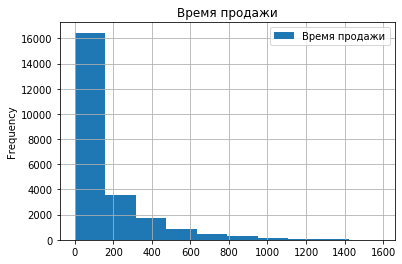

In [12]:
data.plot(y='days_exposition',kind='hist',label='Время продажи',title='Время продажи',grid=True)
print('Среднее время продажи: {:.0f}'.format(data['days_exposition'].mean()))
print('Медиана времени продажи: {:.0f}'.format(data['days_exposition'].median()))

### Вывод

Построим гистограммы для площади,цены,числа комнат и высоты потолков. Видим большие выбросы в каждом из параметров, которы сильно сдвигают среднее значение.Выведим информацию по этим четырем параметрам функцией describe().Видим что максимальные значения очень сильно отклоняюся от среднего и медианы, особенно в столбцах цена и общая площадь.Квартиры метраж которых больше 200 м2 встречаются очень редко, как и ценой более 20000 тыс.руб,квартиры с более чем тремя комнатами тоже редкость, как и потолки выше 3 м.Так наибольшее число обявлений приходится на интерал по площади от 12 до 200 м2, по цене от 2000 до 20000 тыс.руб, по числу комнат от 1 до 3, по высоте потолков от 2.6 до 3 м.С этими интервалами и будем дальше работать.На графике Время продажи тоже видим выбросы в виде очень большого количества дней продажи квартиры, из за чего среднее время продажи равно 169 дням, а медиана 95.В данном случае лучше пользоваться медианным значением,так как оно менее подвержено влиянию выбросов.Таким образом обычно продажа квартиры занимает чуть больше трех месяцев.Можно считать что продажи от 1 дня до 3 месяцев прошли очень быстро, а начиная с года очень медленно.

In [13]:
data = data.query('20000>last_price>2000 and 12<=total_area<=200 and 1<=rooms<=3 and 2.6<=ceiling_height<=3')

<font color='blue'>Удаляем выбросы! </font>

Коэффицент корреляции Пирсона: 0.749091402442161


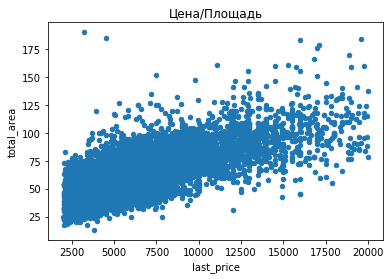

In [14]:
data.plot(x='last_price',y='total_area',kind='scatter',title='Цена/Площадь')
print('Коэффицент корреляции Пирсона:',data['last_price'].corr(data['total_area']))

Из графика и расчета коэффицента корреляции Пирсона видим что есть заметная положительная связь между ценой и площадью кваритры, цена возрастает с ростом площади.

Коэффицент корреляции Пирсона: 0.4646201758065892


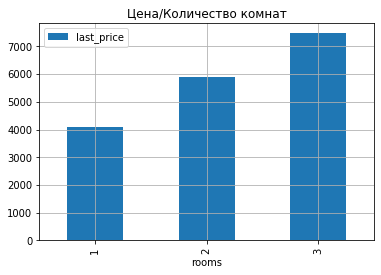

In [15]:
data.pivot_table(index='rooms',values='last_price').plot(kind='bar',title='Цена/Количество комнат',grid=True)
print('Коэффицент корреляции Пирсона:',data['last_price'].corr(data['rooms']))

Из графика и расчета коэффицента корреляции Пирсона видим что есть умеренная положительная связь между ценой и количеством комнат.Цена на трехкомнатные квартиры выше чем на однушки и двушки.

Коэффицент корреляции Пирсона: -0.31219517750556386


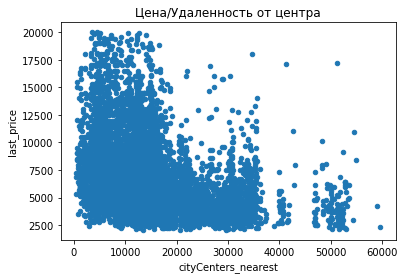

In [16]:
data.plot(x='cityCenters_nearest',y='last_price',kind='scatter',title='Цена/Удаленность от центра')
print('Коэффицент корреляции Пирсона:',data['last_price'].corr(data['cityCenters_nearest']))

Из графика и расчета коэффицента корреляции Пирсона видим что, связь слабо отрицательная между ценой квартиры и удаленностью от центра.Чем ближе к центру, тем стоимость и предложения квартир выше.

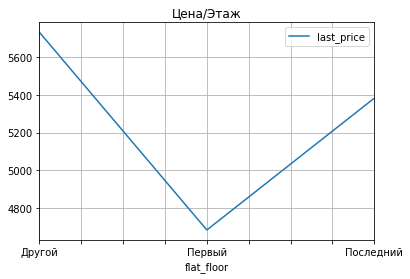

In [17]:
data.pivot_table(index='flat_floor',values='last_price').plot(kind='line',title='Цена/Этаж',grid=True)

Из графика видно что самые низкие цены за квартиры на первом этаже, выше на последнем и самые высокие за другие этажи.

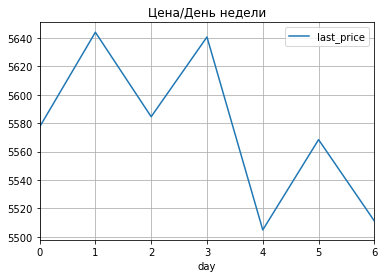

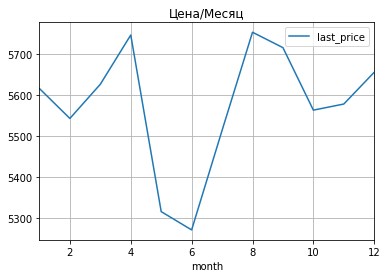

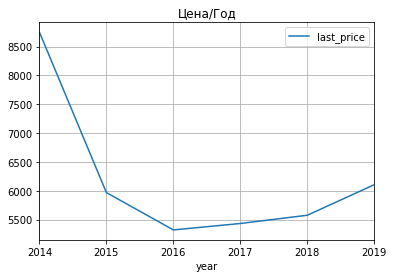

In [18]:
data.pivot_table(index='day',values='last_price').plot(kind='line',title='Цена/День недели',grid=True)
data.pivot_table(index='month',values='last_price').plot(kind='line',title='Цена/Месяц',grid=True)
data.pivot_table(index='year',values='last_price').plot(kind='line',title='Цена/Год',grid=True)

### Вывод

Размещение объявлений с самой высокой ценой было в четверг и понедельник, по месяцам лидируют апрель и август. В 2014 году цена в объявлении за квартиру была выше чем в последующих годах.

In [19]:
data_top = data.pivot_table(index='locality_name',values='price_m2',aggfunc=(['count','mean']))
data_top.columns = ['count','mean']
data_top.sort_values('count',ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,9991,110.766890
посёлок Мурино,493,84.904665
посёлок Шушары,364,77.969780
Всеволожск,311,68.414791
посёлок Парголово,283,90.042403
деревня Кудрово,278,91.838129
Пушкин,236,103.326271
Гатчина,201,69.845771
Колпино,184,75.369565


### Вывод

В таблице представлены топ 10 населенных пунктов по количеству объявлений со средней стоимостью квадратного метра в тыс.руб.Как и ожидалось самая высокая цена за м2 в Санкт-Петербурге, за ним идут ближайшие населенные пункты в которых есть метро(Мурино и Шушары),затем благоустроенные пригороды с хорошей экологией.

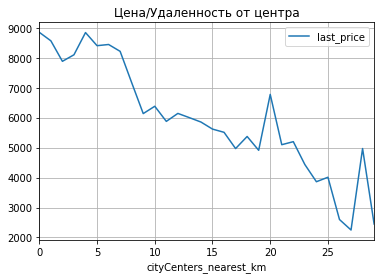

In [20]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']//1000
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km',values='last_price',aggfunc='mean').plot(kind='line',title='Цена/Удаленность от центра',grid=True)

### Вывод

Цена за квартиры в Санкт-Петербурге не равномерно, но снижается по мере удаления от центра города.График сильно меняется от 0 до 10 км,это и будет наша центральная зона.

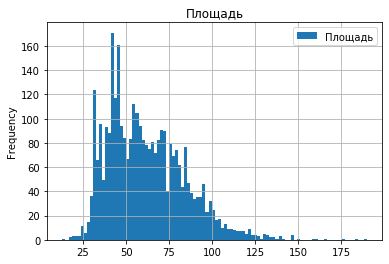

In [21]:
data_spb_center = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km<=10')
data_spb_center.plot(y='total_area',bins=100,kind='hist',label='Площадь',title='Площадь',grid=True)

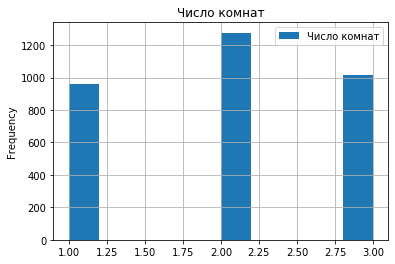

In [22]:
data_spb_center.plot(y='rooms',kind='hist',label='Число комнат',title='Число комнат',grid=True)

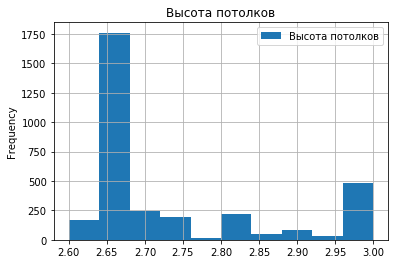

In [23]:
data_spb_center.plot(y='ceiling_height',kind='hist',label='Высота потолков',title='Высота потолков',grid=True)

Коэффицент корреляции Пирсона: 0.749091402442161


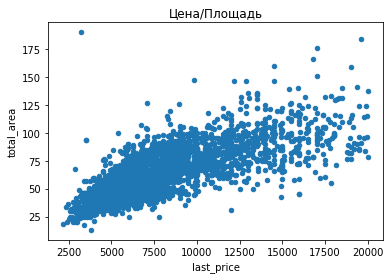

In [24]:
data_spb_center.plot(x='last_price',y='total_area',kind='scatter',title='Цена/Площадь')
print('Коэффицент корреляции Пирсона:',data['last_price'].corr(data['total_area']))

Коэффицент корреляции Пирсона: 0.4646201758065892


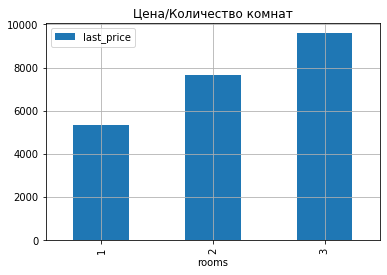

In [25]:
data_spb_center.pivot_table(index='rooms',values='last_price').plot(kind='bar',title='Цена/Количество комнат',grid=True)
print('Коэффицент корреляции Пирсона:',data['last_price'].corr(data['rooms']))

Коэффицент корреляции Пирсона: -0.31219517750556386


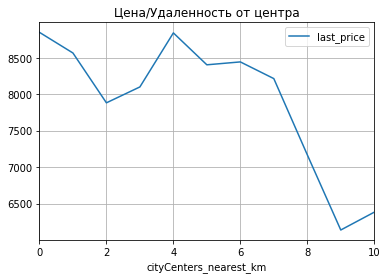

In [26]:
data_spb_center.pivot_table(index='cityCenters_nearest_km',values='last_price').plot(kind='line',title='Цена/Удаленность от центра',grid=True)
print('Коэффицент корреляции Пирсона:',data['last_price'].corr(data['cityCenters_nearest']))

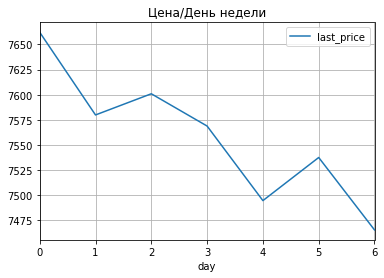

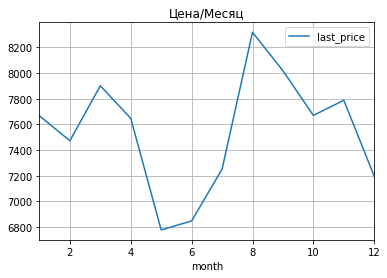

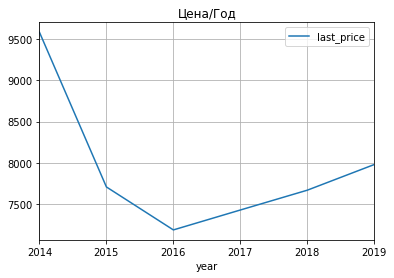

In [27]:
data_spb_center.pivot_table(index='day',values='last_price').plot(kind='line',title='Цена/День недели',grid=True)
data_spb_center.pivot_table(index='month',values='last_price').plot(kind='line',title='Цена/Месяц',grid=True)
data_spb_center.pivot_table(index='year',values='last_price').plot(kind='line',title='Цена/Год',grid=True)

### Вывод

Факторы влияющие на цену кваритры в центре Санкт-Петербурга, такие как площадь,число комнат,удаленность от центра не изменились по сравнению с общими данными,однако день размещения объявления с самой высокой ценой стал понедельник вместо четверга в общих данных, а лидирующим месяцем остался только август, год не изменился(по прежнему в 2014 году были объявления с самой высокой ценой)

## Общий вывод

На основе анализа данных сервиса Яндекс.Недвижимость мы можем сделать вывод что основными факторами влияющими на стоимость жилья являются:
- Метраж квартиры, чем он больше тем дороже цена.
- Число комнат, чем их больше тем цена как правило выше.
- Удаленность от центра и населенный пункт так же сильно влияют на цену квартиры.В Санкт-Петербурге и ближайших пригородах она выше.
- Этаж квартиры так же ожидаемо влияет на стоимость, первые этажи дешевле, чем другие и последние.
- Так же на цену влиияет и день размещения, оказалось, объявления размещенные в середине недели по цене дороже тех что размещались в другие дни, а так же в апреле и сентябре цена объявлений была выше.В 2014 году выставлялись самы дорогоие квартиры.